# Machine Learning
> Neural Networks - Training Fundamentals

- toc: true
- branch: true
- badges: true
- comments: true
- author: Gui Osorio

Post with the goal of giving an overview on how to train a neural network.

Before proceeding, we need to create a training set.

In [1]:
#collapse-hide
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

import numpy as np
import matplotlib.pyplot as plt
import torch

matplotlib.rc('image', cmap='Greys')

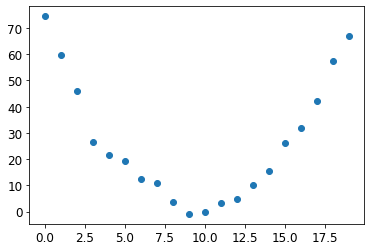

In [2]:
# Create training set of 20 values with some noise
# Define values for time variable (x)
time = torch.arange(0,20).float()

# Define values for speed variable (y/target) - value we are trying to predict
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

plt.scatter(time,speed)

This step creates a quadratic function of a feature time (x) against a target speed (y).

## Step 1 - Initialize parameters

In [3]:
# Initialize parameters to random values
params = torch.randn(3).requires_grad_()
orig_params = params.clone()
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

The step above initializes 3 random parameters and defines a tensor 'params' to store them.

The requires_grad_() method is required to allow for the calculation of the gradient of the function, so we can update the parameters later on.

## Step 2 - Calculate predictions

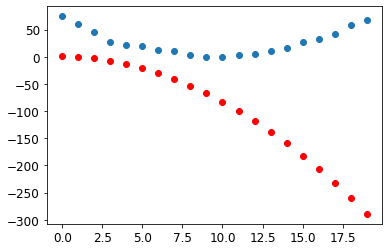

In [4]:
# Define function to be used when predicting our targets 
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

# Calculate predictions
preds = f(time, params)

# Visualize predictions
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
show_preds(preds)

After initializing our weights, we define a function f which will try to predict our target based on our params.

This function is very innacurate yet, but don't worry, the process we will go through will train our parameters to match our targets through this function!

## Step 3 - Calculate loss

In [5]:
# Define a loss function (mse in this case)
def mse(preds, targets): return ((preds-targets)**2).mean()

# Calculate loss based on predictions made earlier
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

A loss is a metric used to tell our model how close our predictions are from our targets, so it can later update our parameters to be closer to them. (through the calculation of gradients, which we will see above)

## Step 4 - Calculate gradients

In [6]:
# Calculate gradients
loss.backward()
params.grad

tensor([-53195.8594,  -3419.7148,   -253.8908])

The gradients represent the degree to which our loss function will change given a change in a parameter. This value represents the derivative of our parameters in relation to the loss function. Since we want to minimize our loss function, we can predict in which direction to move our parameters in order to achieve this goal.

## Step 5 - Step (update parameters)

In [7]:
# Define a learning rate
lr = 1e-5

# Update params based on lr and gradient
params.data -= lr * params.grad.data

# Reset gradients
params.grad = None

To update our parameters, we need to set a learning rate. The learning rate can't be too small, as it would require more training since the parameters would be optimized very slowly. It also cannot be too large, as we risk missing out on the optimal value for our parameters, or needing unnecessary training epochs.

## Put it all together - train model

In [8]:
def train_epoch(p, i=None, prn=True): # Option to print loss
    preds = f(time, p) # Predictions
    loss = mse(preds, speed) # Loss
    loss.backward() # Gradients
    p.data -= lr * p.grad.data # Step
    p.grad = None
    if prn and i >= 0: print(f'Loss after epoch {i+1}: ', loss.item()) 
    elif prn: print(loss.item())
    return preds

for i in range(10): train_epoch(params, i=i)

Loss after epoch 1:  5435.53662109375
Loss after epoch 2:  1577.4495849609375
Loss after epoch 3:  847.3780517578125
Loss after epoch 4:  709.2225952148438
Loss after epoch 5:  683.0757446289062
Loss after epoch 6:  678.1244506835938
Loss after epoch 7:  677.1839599609375
Loss after epoch 8:  677.0025024414062
Loss after epoch 9:  676.9644165039062
Loss after epoch 10:  676.9537353515625


As we can see, our loss is decreasing after each epoch: our model is working!!

OBS: although after 10 epochs our loss has always decreased, there is a risk of the loss actually increasing instead. This is called overfitting and is a huge challenge in training ML models in general today.

In [9]:
#hide
# reset parameters to original values
params = orig_params.detach().requires_grad_()

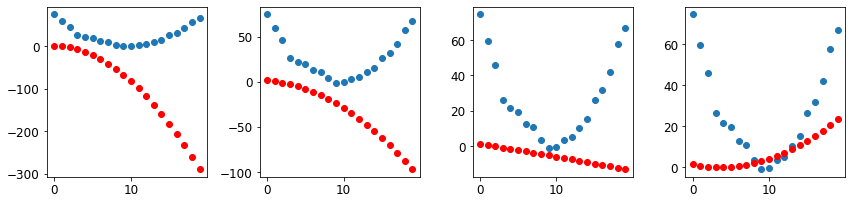

In [10]:
# Visualize first 4 epochs
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(train_epoch(params, prn=False), ax)
plt.tight_layout()

Above is the visual representation of the training of our 4 epochs.

**Congratulations! You now know the basic steps of training a neural network!!**